In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv('/kaggle/input/lp-5-assignments/Google_Stock_Price_Train.csv')

In [19]:
df_test = pd.read_csv('/kaggle/input/lp-5-assignments/Google_Stock_Price_Test.csv')

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train['Open'] = scaler.fit_transform(df_train[['Open']])
df_test['Open'] = scaler.fit_transform(df_test[['Open']])

In [24]:
def create_slots(df):
    X_train = []
    y_train = []
    price_list = df['Open'].to_list()
    print(len(price_list))
    for i in range(len(price_list)-60):
        X_train.append(price_list[i:i+60])
        y_train.append(price_list[i+60])
    return np.array(X_train).reshape(-1,60,1),np.array(y_train)

In [25]:
X_train,y_train = create_slots(df_train)

1258


In [29]:
df_test = pd.concat([df_train,df_test],axis=0)

In [30]:
X_test, y_test = create_slots(df_test)

1278


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense

In [11]:
model = Sequential([
    SimpleRNN(50,activation='tanh',input_shape=(60,1),return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50,activation='tanh',return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50,activation='tanh',return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50,activation='tanh'),
    Dropout(0.2),
    Dense(1,activation='relu')
])

In [12]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'],run_eagerly=True)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5

In [14]:
model.fit(X_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
38/38 [==============================] - 23s 595ms/step - loss: 0.2126 - mae: 0.3771
Epoch 2/10
38/38 [==============================] - 22s 591ms/step - loss: 0.1540 - mae: 0.3189
Epoch 3/10
38/38 [==============================] - 22s 590ms/step - loss: 0.1445 - mae: 0.3094
Epoch 4/10
38/38 [==============================] - 22s 590ms/step - loss: 0.1303 - mae: 0.2840
Epoch 5/10
38/38 [==============================] - 22s 588ms/step - loss: 0.1230 - mae: 0.2817
Epoch 6/10
38/38 [==============================] - 22s 591ms/step - loss: 0.1042 - mae: 0.2579
Epoch 7/10
38/38 [==============================] - 22s 589ms/step - loss: 0.1001 - mae: 0.2489
Epoch 8/10
38/38 [==============================] - 23s 598ms/step - loss: 0.0727 - mae: 0.2124
Epoch 9/10
38/38 [==============================] - 22s 588ms/step - loss: 0.0668 - mae: 0.2054
Epoch 10/10
38/38 [==============================] - 22s 589ms/step - loss: 0.0510 - mae: 0.1775


In [15]:
from sklearn.metrics import r2_score

In [32]:
preds = model.predict(X_test)

39/39 [==============================] - 12s 318ms/step


In [33]:
X_test.shape

(1218, 60, 1)

In [36]:
score = r2_score(y_test,preds)

In [37]:
score

0.8115185355691278

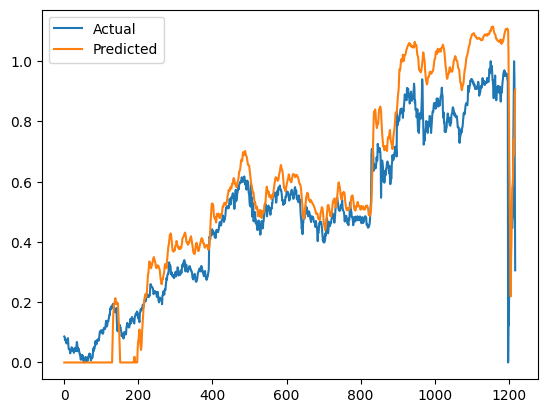

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test,label="Actual")
plt.plot(preds,label="Predicted")
plt.legend()
plt.show()